初めてのパターン認識のKNN法をsklearnを使用して実装している

[sklearn.neighbors.KNeighborsClassifierのドキュメント](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

実装した内容は以下の記事に沿っている

[k-近傍法をpythonのsklearnで実装してみる](https://qiita.com/renesisu727/items/e5191a97d3f16a14ebd0)


In [9]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
iris_target_data = pd.DataFrame(iris.target, columns=['Species'])
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

X_train, X_test, Y_train, Y_test = train_test_split(iris_df, iris_target_data)
print(iris_df)
print(iris_target_data)
# Xのテストデータを覗いてみる
print(X_train)
# それに対してYのテストデータを覗いてみる
print(Y_train)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
     Species
0          0
1          0
2

出力が省略されているが、iris(あやめ)のデータセットを読み込んで出力している。

次にk-近傍法のモデルを作成していく


In [6]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

精度を評価する

In [7]:
Y_pred = knn.predict(X_test)
print(metrics.balanced_accuracy_score(Y_test,Y_pred))

0.9375


近傍とするデータの数を変更していき精度がどのくらい変化するか図示していく。


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was

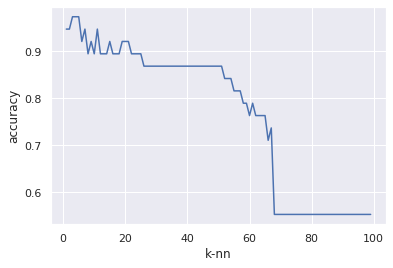

In [8]:
accuracy_list = []
sns.set()
k_range = range(1, 100)
for k in k_range:
    # 近傍k個とする
    knn = KNeighborsClassifier(n_neighbors=k)
    # データにfitさせる、学習 
    knn.fit(X_train, Y_train)
    # Xのテストデータに対してYを予測させる
    Y_pred = knn.predict(X_test)
    # 精度をリストに保存する
    accuracy_list.append(metrics.accuracy_score(Y_test, Y_pred))

figure = plt.figure()
ax = figure.add_subplot(111)
ax.plot(k_range, accuracy_list)
ax.set_xlabel('k-nn')
ax.set_ylabel('accuracy')
plt.show()